#  Machine Learning: Basic Principles 2018
## Classification
## Learning goals
In this exercise, you will learn how to formulate and solve a classification problem. A classification problem amounts to finding a good classifier which maps a given data point (e.g. a snapshot taken by an on-board camera) via its features to a particular label. The label indicates to which class or category the data point belongs. 
We will implement **logistic regression** and use **Gradient Descent** to find the optimal weights. We will look at binary as well as multiclass classification. 

## Exercise Contents

1. Introduction
    * Here we formulate a classification problem.
2. Dataset
    * A description of the dataset.
3. Exercise
    * A total of 5 tasks and 1 demo. Read the task descriptions and answer according to the tasks.
        * 3.1 **Getting Hands on the Data**
        * 3.2 **Logistic Regression**
        * 3.3 **Gradient Descent Step Size**
        * 3.4 **Accuracy - How well did we do?**
        * 3.5 **Multiclass Classification (One vs All)**

### Keywords
`Classification`,`Logistic Regression`, `Sigmoid Function`, `Gradient Descent (GD)`

## 1 Introduction
Suppose you are an intern at the fictive company `Hunda` whose brand-new lawn mower robot uses its on-board camera to find out on which surface it is moving.
Your job is to develop a firmware module which allows the mower robot to classify images generated by the camera according to the categories "I see grass", "I see soil", "I see tiles". 

To do so we will use a specific classification method named logistic regression. We will first develop a logistic regression model which can distinguish between "I see grass" and "I do not see grass". After that we will extend this model to also be able to distinguish non-grass images further between soil and tiles images. 

In order to develop this module you are provided with a bunch of snapshots that have been labeled according to these three categories manually by the previous summer intern. Thus, we can use this labeled data to train the firmware module. 

![](./images/banner.jpg)

## 2 Data
The available dataset consists of $N=55$ pictures, saved in the folder named `images`:
* 20 images of grass (`image_1.jpg` to `image_20.jpg`)
* 20 images of soil (`image_21.jpg` to `image_40.jpg`)
* 15 images of tiles (`image_41.jpg` to `image_55.jpg`)

You can use the Python package `PIL` (=the Python Imaging Library) to access the image data. The basics of PIL are demonstrated below, so you can use those functions in the exercise. 

In [1]:
from PIL import Image

# Read in an image from a jpg-file and store it in the variable im
im = Image.open("images/image_1.jpg");

# Determine the size of the image
width, height = im.size;
print('width: %d, height: %d' % (width, height))
       

# Convert the image to RGB
rgb_im = im.convert('RGB');

# Determine the rgb values of the pixel at location (row,col) where both row and col are 0
pixel = rgb_im.getpixel((0,0))
print('Pixel (R, G, B): (%d, %d, %d)' % (pixel[0], pixel[1], pixel[2]))

width: 246, height: 204
Pixel (R, G, B): (160, 184, 88)


## 3 Exercise
The actual exercise starts from here and it has been divided into 5 tasks and 1 demo:
* 3.1 **Getting Hands on the Data**
* 3.2 **Logistic Regression**
* 3.3 **Gradient Descent Step Size**
* 3.4 **Accuracy - How well did we do?**
* 3.5 **Multiclass Classification (One vs All)**

Your task is to fill in `...` under `### STUDENT TASK ###` in each step.

## 3.1 Getting Hands on the Data
After reading in the RGB images, we have to change them into a form that we can process more easily. Although the images are quite small (less than 3000x3000 pixels) we cannot easily process an image by just stacking the pixels into a vector since it would be of size $3000^2$. Instead, we represent an image by only $d=3$ features, namely the average red, green and blue components (the "redness", "greenness" and "blueness") which are denoted $x_{r}, x_{g}, x_{b}$. Thus, we characterize the $i$th image in our dataset using the feature vector $\mathbf{x}^{(i)} = \big(x_{r}^{(i)},x_{g}^{(i)},x_{b}^{(i)} \big)^{T} \in \mathbb{R}^{3}$. In particular, $x^{(1)}_{r}$ denotes the average red component of the first image in the trainging dataset. 

It will be convenient to stack the feature vectors $\mathbf{x}^{(i)} \in \mathbb{R}^{3}$ obtained for all images in our (training) dataset into the feature matrix 
\begin{equation*}
    \mathbf{X} = \big(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(55)}\big)^T=\begin{bmatrix}
    x^{(1)}_{r}  & x^{(1)}_{g}  & x^{(1)}_{b} \\
    \vdots & \ddots & \vdots\\
    x^{(55)}_{r} & x^{(55)}_{g} & x^{(55)}_{b}
    \end{bmatrix} \in \mathbb{R}^{N \times 3}
    \label{xm}
    \tag{1}
\end{equation*}

Each image in the training set has a label $y^{(i)}$ where $y^{(i)} = 1$ if the i-th image shows grass while $y^{(i)} = 0$ otherwise (when it shows soil or tiles). It will be convenient to stack the labels into the label vector $\mathbf{y}$.

\begin{equation*}
    \mathbf{y}=\begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(N)}
    \end{bmatrix},\ i \in \{1,\dots,N \}
    \label{vy}
    \tag{2}
\end{equation*}

### Tasks:
- Implement a Python function `get_feature_matrix()` which returns the feature matrix (\ref{xm}) of size $55 \times 3$.
- Implement a Python function `get_labels()` which returns the label vector (\ref{vy}).
    - The vector should contain the **labels** for each image. The label is `1` if the picture shows grass, `0` if it doesn't.
- Implement a Python function `Visualize_data()` to draw three **scatter plots**.
    - Make a scatter plot for each color combination (*Greenness vs Redness*,*Greenness vs. Blueness* and *Redness vs Blueness*).
        - In these plots, mark a datapoint with a cross if it's a grass picture and with a dot if it's not.
    - The plot labels and axes are preconfigured, your job is to setup the correct x and y -values to each `plt.scatter()`-function.
    - These scatter plots are a helpful tool for giving us an idea of the relation between the features and the two labels.

### Tips:
- Since it takes some time to compute the feature matrix $\mathbf{X}$, you might want to save it as .txt, .csv or any other format that is convenient for you. This way you can just reload the matrix from the file without processing the images again.

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def get_feature_matrix(N = 55):
    
    #initialize the feature vector with zeros. 
    x_vec = np.zeros((N,3))

    x = []
    ### STUDENT TASK ###
    ## Loop through each picture and each pixel and sum the RGB values into the feature vector matrix.
    ## At last, remember to divide each R, G and B sum with the total pixel count to get the average value.
    ## Hint: Most of the commands required for this task are in the 2.Dataset-section.
    ### BEGIN SOLUTION
    for i in range(N):
        sum_r = 0; sum_g = 0; sum_b = 0
        im = Image.open("images/image_{}.jpg".format(i+1))
        width, height = im.size # Size of Image
        total_pixels = width*height
        rgb_im = im.convert('RGB')


        for row in range(width):
            for col in range(height):
                r,g,b = rgb_im.getpixel((row,col))
                sum_r += r
                sum_g += g
                sum_b += b
                
        x_vec[i,0] = sum_r/total_pixels
        x_vec[i,1] = sum_g/total_pixels
        x_vec[i,2] = sum_b/total_pixels
    ### END SOLUTION
    return x_vec;

def get_labels(N=55):
    y = np.zeros((N,1));
    ### STUDENT TASK ###
    ## Generate the label vector, where 1 is a Grass image and 0 is Non-Grass.
    ## Hint: See the 2.Dataset-section where the picture order is defined.
    ### BEGIN SOLUTION
    for i in range(N):
        if (i < 20):
            y[i,:] = 1 # Grass
        else:
            y[i,:] = 0 #Non-Grass
    ### END SOLUTION
    return y

""" VISUALIZE THE DATA """
def Visualize_data(X,y):

    indx_1 = np.where(y == 1) # for grass.
    indx_2 = np.where(y == 0) # for non-grass.
    
    # Set figure size (width, height)
    fig, axes = plt.subplots(1, 3,figsize=(15, 5))
    # PLOT GREENNESS AGAINST REDNESS
    #Make a scatterplot of the average greenness vs redness. 
    #Indicate Grass images by a cross, and others by a dot.
    ### STUDENT TASK ###
    #axes[0].scatter(...,..., c='g', marker ='x', label='Grass')
    #axes[0].scatter(...,..., c='r', marker ='o', label='Soil+Tiles')
    ### BEGIN SOLUTION
    axes[0].scatter(X[indx_1,1], X[indx_1,0], c='g', marker ='x', label='Grass')
    axes[0].scatter(X[indx_2,1], X[indx_2,0], c='r', marker ='o', label='Soil+Tiles')
    ### END SOLUTION
    axes[0].set_xlabel('Greenness of Images')
    axes[0].set_ylabel('Redness of Images')
    axes[0].legend()
    axes[0].set_title(r'$\bf{Figure\ 1.}$Green vs Red')

    # PLOT GREENNESS AGAINST BLUENESS
    #The same as above but now greenness vs blueness.
    ### STUDENT TASK ###
    #axes[1].scatter(..., ..., c='g', marker ='x', label='Grass')
    #axes[1].scatter(..., ..., c='b', marker ='o', label='Soil+Tiles')
    ### BEGIN SOLUTION
    axes[1].scatter(X[indx_1,1], X[indx_1,2], c='g', marker ='x', label='Grass')
    axes[1].scatter(X[indx_2,1], X[indx_2,2], c='b', marker ='o', label='Soil+Tiles')
    ### END SOLUTION
    axes[1].set_xlabel('Greenness of Images')
    axes[1].set_ylabel('Blueness of Images')
    axes[1].legend()
    axes[1].set_title(r'$\bf{Figure\ 2.}$Green vs Blue')

    # PLOT REDNESS AGAINST BLUENESS
    #The same as above but now redness vs blueness.
    ### STUDENT TASK ###
    #axes[2].scatter(..., ..., c='r', marker ='x', label='Grass')
    #axes[2].scatter(..., ..., c='b', marker ='o', label='Soil+Tiles')
    ### BEGIN SOLUTION
    axes[2].scatter(X[indx_1,0], X[indx_1,2], c='r', marker ='x', label='Grass')
    axes[2].scatter(X[indx_2,0], X[indx_2,2], c='b', marker ='o', label='Soil+Tiles')
    ### END SOLUTION
    axes[2].set_xlabel('Redness of Images')
    axes[2].set_ylabel('Blueness of Images')
    axes[2].legend()
    axes[2].set_title(r'$\bf{Figure\ 3.}$Red vs Blue')
    plt.tight_layout()
    plt.show()
    return axes

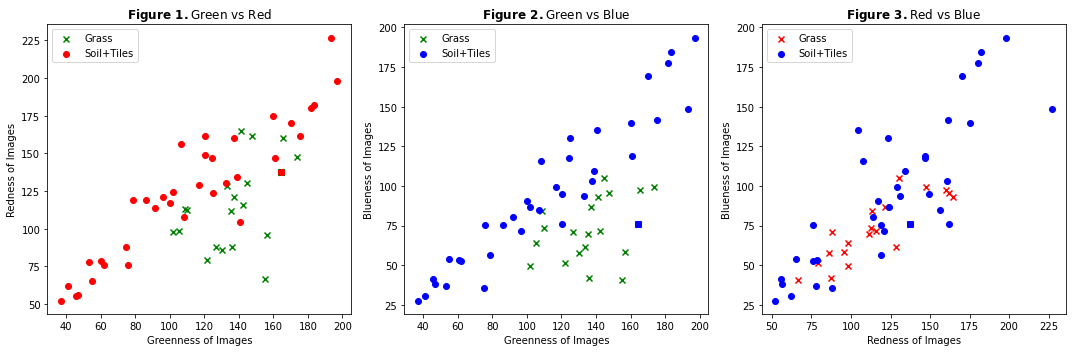

In [3]:
y = get_labels()
X = get_feature_matrix()


# Full Vector
# Let s label : Grass = 1 , Soil = 0, Tiles = 0
assert X.shape == (55,3)
axes = Visualize_data(X,y)
### BEGIN HIDDEN TESTS
from plotchecker import ScatterPlotChecker
for i in range(len(axes)):
    pc = ScatterPlotChecker(axes[i])
    color1 = pc.colors[0]
    color2 = pc.colors[-1]
    for c in range(len(pc.colors)):
        if c < 40:
            np.testing.assert_array_equal(pc.colors[c],color1,f"In Figure {i+1}. You assigned image_{c//2}.jpg color incorrectly")
        else:
            np.testing.assert_array_equal(pc.colors[c],color2,f"In Figure {i+1}. You assigned image_{c//2}.jpg color incorrectly")

### END HIDDEN TESTS

## 3.2 Logistic Regression
Our goal is to find out the label $y$ of an image, with $y=1$ if the image shows grass and $y=0$ otherwise, based on its features $\mathbf{x}$. Similar to linear regression, logistic regression applies a linear function of the form $h^{(\mathbf{w})}(\mathbf{x})= \mathbf{w}^{T} \mathbf{x}$ to predict the label $y$ based on the features $\mathbf{x} = \big(x_{r},x_{g},x_{b} \big)^{T} \in \mathbb{R}^{3}$ of the image. In contrast to linear regression, which uses the squared error loss, here we use the **logistic loss** to measure the quality of a particular classifier $h^{(\mathbf{w})}$. The logistic loss is defined as:

\begin{equation*}
    \mathcal{L}\big((\mathbf{x},y),h^{(\mathbf{w})}\big) = -y\log\big(\sigma(h^{(\mathbf{w})}(\mathbf{x}))\big)-(1-y)\log\big(1-\sigma(h^{(\mathbf{w})}(\mathbf{x}))\big)
    \label{loss}
    \tag{3}
\end{equation*}

where $\sigma$ is the sigmoid function, which is defined as:
\begin{equation*}
    \sigma(z)= \frac{1}{1+{\rm exp}(-z)}.
    \label{sigmoid}
    \tag{4}
\end{equation*}

**Note that the expression \eqref{loss} for the logistic loss applies only if the classes are encoded as $y=1$ and $y=0$. If the two classes are encoded as $y=1$ and $y=-1$, we obtain a different formula for the logistic loss.** 

Since we have $N=55$ labeled images, each of them characterized by the features $\mathbf{x}^{(i)}$ and the true label $y^{(i)}$, we can evaluate the logistic loss for all those images to obtain the empirical risk. 

\begin{align}
\mathcal{E}(\mathbf{w}) & = \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}((\mathbf{x}^{(i)},y^{(i)}),\ h^{(\mathbf{w})}) \nonumber \\ 
&  = \frac{1}{N} \sum_{i=1}^{N} -y^{(i)}\log\big(\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\log\big(1-\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)
   \label{erm}
    \tag{5}
\end{align}

Note that the empirical risk $\mathcal{E}( \mathbf{w})$ is a differentiable convex function of the weight vector $\mathbf{w}$. Therefore, we can use **gradient descent (GD)** to find the weight vector $\mathbf{w}_{\rm opt}$ which minimizes the loss function. In particular, GD constructs a sequence of weight vectors $\mathbf{w}^{(k)}$ by iterating (=repeating) the GD update

\begin{equation*}
    \mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} − \alpha\nabla \mathcal{E}(\mathbf{w}^{(k)})
    \label{gd}
    \tag{6}
\end{equation*}

Assume we run the GD updates for $k$ iterations which results in the weight vector $\mathbf{w}^{(k)}$ and corresponding classifier map $h^{(\mathbf{w}^{(k)})}(\mathbf{x}) = \big(\mathbf{w}^{(k)} \big)^{T} \mathbf{x}$. Using this classifier map, we can compute the predicted label for a new image with features $\mathbf{x}=\big(x_{r},x_{g},x_{b}\big)^{T}\in \mathbb{R}^{3}$ via simple thresholding

\begin{equation*} 
    \hat{y} = \begin{cases} 
        1 &\text{if}\ \sigma\big(h^{(\mathbf{w}^{(k)})}(\mathbf{x})\big) \geq 1/2\\
        0 &\text{if}\ \sigma\big(h^{(\mathbf{w}^{(k)})}(\mathbf{x})\big) < 1/2
    \end{cases}
    \label{eq_classify}
    \tag{7}
\end{equation*}

### Tasks
- Implement a Python function `sigmoid_function(z)` which returns the function value (\ref{sigmoid}) of the sigmoid function.
    - In our case $z$ is the dot product of the weight vector and the feature vector. 
- Implement a Python function `gradient(X,y,w)` which takes as input the feature matrix $\mathbf{X}$, the label vector $\mathbf{y}$ and the weight vector $\mathbf{w}$. The function should return the gradient of the empirical risk $\mathcal{E}(\mathbf{w})$ (\ref{erm}) at the vector $\mathbf{w}$.
- Implement a Python function `logisticRegression_func(X,y,step_size, K)` which takes as input the feature matrix $\mathbf{X}$, the label vector $\mathbf{y}$, the GD step size `step_size` and the number `K` of GD steps. The function should deliver the final GD iterate $\mathbf{w}^{(K)}$ and a vector of length K whose $k^{th}$ entry is the empirical risk $\mathcal{E}(\mathbf{w}^{(k)})$.
- Implement a Python function `predict_output()` which takes as input the feature matrix $\mathbf{X}$ and the optimal weight vector $\mathbf{w}$ and returns a vector of length $N$ containing the predicted labels $\mathbf{\hat{y}}$ (see Eq. (\ref{eq_classify})). 

In [4]:
def sigmoid_func(z):
    ### STUDENT TASK ###
    # sigmoid = ...
    ### BEGIN SOLUTION
    sigmoid = 1/(1+np.exp(-z));
    ### END SOLUTION
    return sigmoid

def gradient(X,y,w):
    ### STUDENT TASK ###
    # grad = ...
    ### BEGIN SOLUTION
    N = np.size(X,0)
    grad = (1/N)*np.dot(X.T,sigmoid_func(np.dot(X,w.T))-y)
    ### END SOLUTION
    return grad

def logisticRegression_func(X,y,step_size, K):
    N = X.shape[0]
    d = X.shape[1]
    # Initialize w as 1xd array.
    w = np.zeros((1,d))
    loss = float('inf')
    loss_list = []
    for i in range(K):
        ### STUDENT TASK ###
        ### BEGIN SOLUTION
        grad = gradient(X,y,w)
        w = w - step_size*grad.T # 1xd
        z = np.dot(X,w.T) # Nx1
        h = sigmoid_func(z) # Nx1
        loss_1 = - np.dot( y.T, np.log(h) ) # 1x1 y^T*log(h(z))
        loss_0 = - np.dot( (np.ones((N,1))-y).T, np.log(np.ones((N,1))-h) ) # 1x1 (1-y)^T*log(1-h(z))
        loss = loss_1 + loss_0
        loss_list.append(loss[0]/N)
        ### END SOLUTION
    return loss_list, w

""" Predict Output """
def predict_output(X,w):
    ### STUDENT TASK ###
    ### BEGIN SOLUTION
    z = np.dot(X,w.T)
    predict_y = sigmoid_func(z)
    N = predict_y.shape[0]
    y = np.zeros((N,1));
    for i in range(N):
        if (predict_y[i,:]>=0.5):
            y[i,:] = 1;
        elif (predict_y[i,:]<0.5):
            y[i,:] = 0;
    ### END SOLUTION
    return y

In [5]:
# Execute this cell. Do not modify.
step_size = 1e-5
num_iter = 3000
e_list, w_opt = logisticRegression_func(X,y,step_size,num_iter)
print ('The optimal weight vector is:', w_opt)
y_hat = predict_output(X,w_opt)

### BEGIN HIDDEN TESTS
assert np.sum(e_list)/num_iter < 40
assert y_hat.shape == (55,1)
y_predict_test = predict_output(np.array([[-1,1],[0,1],[-1,1],[1,1]]),np.array([[1,0]]))
assert y_predict_test.shape == (4,1) 
np.testing.assert_array_equal(y_predict_test, np.array([[0],[1],[0],[1]]))

# Test prediction function
for i in np.linspace(-1,1,100,endpoint=False):
    if i < 0:
        np.testing.assert_array_equal(predict_output(np.array([[i,1]]),np.array([[1,0]])),np.array([[0]]), "Incorrect output. Check that you defined and interpreted sigmoid correctly.")
    else:
        np.testing.assert_array_equal(predict_output(np.array([[i,1]]),np.array([[1,0]])),np.array([[1]]), "Incorrect output. Check that you defined and interpreted sigmoid correctly.")


from unittest.mock  import patch
# Test that each function is called
with patch("__main__.sigmoid_func",side_effect=sigmoid_func) as mock:
    logisticRegression_func(np.array([[0,1]]),np.array([0]),step_size,200)
    assert mock.called
with patch("__main__.gradient",side_effect=gradient) as mock:
    logisticRegression_func(np.array([[0,1]]),np.array([0]),step_size,200)
    assert mock.called

### END HIDDEN TESTS

The optimal weight vector is: [[-0.02962347  0.06869775 -0.05990811]]


## 3.3 Gradient Descent Step Size
The performance of GD depends crucially on the step size $\alpha$. This task requires you to investigate how different choices for the step size influence the behavior of GD. 

### Tasks
- Implement a Python function `visualize_error()` which iterates over different step sizes given in array `step_sizes=[0.1,0.5,1,5,10,16]`.
    - Use `logisticRegression_func()` which you implemented in task`3.2: Logistic Regression` with each step size, it should return a list of errors.
    - Plot each of these error lists. You should see two plots with 6 descending lines.
    - Figure out which step size has the fastest convergence and mark the corresponding curve in red (i.e. by changing `best=None` to right step size. For example if you think that the best step size is 1, choose `best=1`). Now you should see a plot where one line is red and rest of them are blue.

<Figure size 864x288 with 0 Axes>

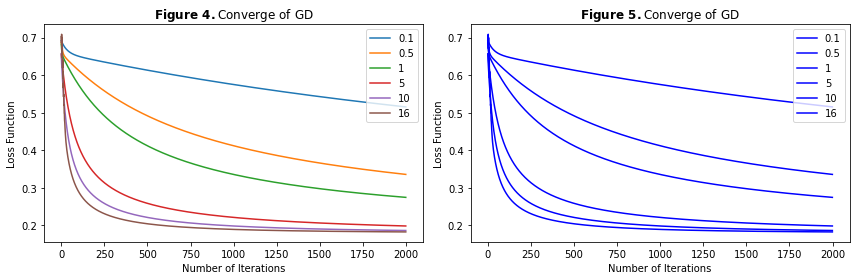

<Figure size 864x288 with 0 Axes>

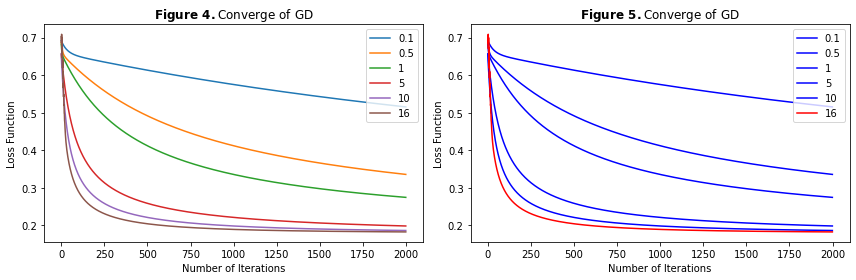

In [6]:
def visualize_error(X, y, step_sizes, best = None, num_iter = 2000):
    plt.figure(figsize=(12, 4))
    fig, axes = plt.subplots(1, 2,figsize=(12, 4))
    for step in step_sizes:
        ### STUDENT TASK ###
        # Plot Error against Step Size
        # loss_list, w_opt = 
        ### BEGIN SOLUTION
        loss_list, w_opt = logisticRegression_func(X,y,step, num_iter)
        ### END SOLUTION
        n = len(loss_list) # Size of list remains the same.
        x_axes = np.linspace(0,n,n,endpoint=False)
        axes[0].plot(x_axes, loss_list, label=step)
    axes[0].set_xlabel('Number of Iterations')
    axes[0].set_ylabel('Loss Function')
    axes[0].legend()
    axes[0].set_title(r'$\bf{Figure\ 4.}$Converge of GD')
    
    for step in step_sizes:
        ### STUDENT TASK ###
        # Plot Error against Step Size.
        # Now mark the best converge in red. Use value from best as a correct step size.
        # loss_list, w_opt = 
        ### BEGIN SOLUTION
        loss_list, w_opt = logisticRegression_func(X,y,step, num_iter)
        ### END SOLUTION
        n = len(loss_list) # Size of list remains the same.
        x_axes = np.linspace(0,n,n,endpoint=False)
        if step == best:
            axes[1].plot(x_axes, loss_list, label=step, color="red")
        else:
            axes[1].plot(x_axes, loss_list, label=step, color="blue")
    
    axes[1].set_xlabel('Number of Iterations')
    axes[1].set_ylabel('Loss Function')
    axes[1].legend()
    axes[1].set_title(r'$\bf{Figure\ 5.}$Converge of GD')
    plt.tight_layout()
    plt.show()
    return best, axes

### STUDENT TASK ###
# Change best=None into step size from the list that provides the fastest converge. e.g best=1
res0_1, axes = visualize_error(X/255, y, best=None, step_sizes=[0.1,0.5,1,5,10,16])
### BEGIN SOLUTION
res0_1, axes = visualize_error(X/255, y, best=16, step_sizes=[0.1,0.5,1,5,10,16])
### END SOLUTION

In [7]:
### BEGIN HIDDEN TESTS
from plotchecker import LinePlotChecker
from nose.tools import assert_equal

for i in range(len(axes)):
    pc = LinePlotChecker(axes[i])
    pc.assert_num_lines(6)
    
assert res0_1 in [0.1,0.5,1,5,10,16], "You should choose the best Converge line"

assert res0_1 == 16
### END HIDDEN TESTS

## 3.4 Accuracy - How well did we do?
In order to assess how well our model works, we calculate the accuracy achieved by the classifier $h^{(\mathbf{w})}$ obtained from task 3.3. We do this by computing the fraction of correctly labeled images, i.e., for which the true label $y^{(i)}$ is equal to the predicted label $\hat{y}^{(i)}$:
\begin{equation*}
    \text{Accuracy} =\dfrac{1}{N} \sum_{i=1}^{N} \mathcal{I}(\hat{y}^{(i)} = y^{(i)})
    \label{acc}
    \tag{8}
\end{equation*}



### Tasks
- Implement a Python function `calculate_accuracy(y,y_hat)` according to (Eq. \ref{acc}) which takes as inputs $\mathbf{y}$ and $\mathbf{\hat{y}}$ and returns the accuracy (as percentage). 

In [8]:
def calculate_accuracy(y,y_hat):
    ### STUDENT TASK ###
    ### BEGIN SOLUTION
    N = y.shape[0];
    correct = 0;
    for i in range(N):
        if (y[i]==y_hat[i]):
            correct += 1
    accuracy = (correct/N)*100
    ### END SOLUTION
    return accuracy

print ('Accuracy of the result is: %.2f%%' % calculate_accuracy(y,y_hat))

Accuracy of the result is: 89.09%


In [9]:
### BEGIN HIDDEN TESTS
assert_equal(100,calculate_accuracy(np.array([0]),np.array([0])))
assert_equal(0,calculate_accuracy(np.array([1]),np.array([0])))
assert_equal(50,calculate_accuracy(np.array([1,0]),np.array([0,0])))
assert_equal(25,calculate_accuracy(np.array([1,1,0,0]),np.array([0,0,1,0])))

assert 70 < calculate_accuracy(y,y_hat) < 100, "Your accuracy should be above 70%"

assert 75 < calculate_accuracy(y,y_hat), "Your accuracy was too weak"
assert calculate_accuracy(y,y_hat) < 90, "Your accuracy was too good. You are probably not using correct methods."
### END HIDDEN TESTS

## 3.5: Multiclass Classification ("One vs All" or "One vs Rest")
We have succesfully implemented a logistic regression model which classifies the current on-board image as showing grass or not. We will now extend this model to know how to classify the image according to the three categories "grass", "soil" or "tiles". 

So is all of our previous work on classifying images into "grass" vs. "no grass" for nothing? Nope! Adapting a binary classification method (using two different label values) to this multiclass task is straightforward using the **“one vs all” technique**. The idea is quite simple: split the multiclass problem into three subproblems, each subproblem being a binary classification problem as considered in task `3.3 Logistic Regression`. In particular, we can solve the problem of classifiying images into classes "grass", "soil" or "tiles" by solving the three subproblems:
* subproblem 1: classify images into "grass"(y=1) vs. "no grass"(y=0) 
* subproblem 2: classify images into "soil"(y=1) vs. "no soil"(y=0) 
* subproblem 3: classify images into "tiles"(y=1) vs. "no tiles"(y=0) 

We can apply the method developed under `3.2: Logistic Regression`, to solve each of these subproblems. The first subproblem has already been solved in Sec. 3.3, so we only need to solve the latter two subproblems. Note that for the three subproblems we use the same feature vector $\mathbf{x}^{(i)}=\big(x_{r}^{(i)},x_{g}^{(i)},x_{b}^{(i)}\big)^{T}$ but a different label $y^{(i)}$ for the $i$th image. In particular, the first image (which shows grass) has label $y^{(1)}=1$ in subproblem 1 but $y^{(1)}=0$ in subproblem 2 and subproblem 3.

For each subproblem we compute the optimal weight vector $\mathbf{w}^{(\rm grass)}$,$\mathbf{w}^{(\rm soil)}$, $\mathbf{w}^{(\rm tiles)}$ by solving the empirical risk minimization problem (5). 

Assume we want to classify a new image with features $\mathbf{x}=(x_{r},x_{g},x_{b})^{T}$ yielding the following predictor values : 
- $h^{(\mathbf{w}^{(\rm grass)})}(\mathbf{x}) = 2$ ("grass vs. no grass")
- $h^{(\mathbf{w}^{(\rm soil)})}(\mathbf{x}) = 1$ ("soil vs. no soil") 
- $h^{(\mathbf{w}^{(\rm tiles)})}(\mathbf{x}) = 5$ ("tiles vs. no tiles")

Thus, the predictor $h^{(\mathbf{w}^{(\rm tiles)})}(x)$ for subproblem 3 (`tiles` vs. `no tiles`) yields the highest confidence. Hence, we classify this image as `tiles`. 

![](./images/MulticlassHunda.jpg)

### Tasks
- Implement a Python function `get_labels_k()` which takes as input the number of data points $N$ and the index $k$ of the subproblem: $k=0$ means subproblem 1, $k=1$ means subproblem 2 and $k=2$ means subproblem 3, and returns the label vector $\mathbf{y}$ for that category. 
    - i.e. either Grass, Soil **or** Tile pictures are `1`, the other 2 are `0`
- Implement a Python function `multiclass()` which implements logistic regression for the three subproblems and then outputs the real labels $\mathbf{y}$, the final predicted labels $\mathbf{\hat{y}}$ and the accuracy. 
    - Use the `logistic_regression()` and `sigmoid_func()` of section 3.3 to get the optimal weight vector and the probability of the picture belonging to that class respectively. 
    - After you have done logistic regression for each of the three categories, predict the class the picture belongs to by choosing the highest probability of all binary classifiers.
    - Use the function `calculate_accuracy` of section 3.4 to calculate the accuracy. 
    - You might want to encode the three classes "Grass", "Soil" and "Tiles" using numbers, e.g. "Grass"=0, "Soil"=1 and "Tiles"=2
    - **Note**: the label vector $\mathbf{y}$ of this function is different than the output from `get_labels_k()`
    


In [10]:
def get_labels_k(N=55,k=0):
    y = np.zeros((N,1));
    ### STUDENT TASK ###
    ## Generate the label vector which has value 1 for the pictures of the category we are currently looking at (indicated by k) 
    ## and 0 for the other two categories. 
    ## Hints: See the 2. Dataset-section where the picture order is defined
    ### BEGIN SOLUTION
    for i in range(N):
        if (k*20 <= i < (k+1)*20):
            y[i,:] = 1 # Grass / Tiles / Soil
        else:
            y[i,:] = 0 #Non-Grass / Non-Tiles / Non-Soil
    ### END SOLUTION
    return y

def multiclass():
    y_predict = []
    step_size = 1e-5
    num_iter = 3000
    for i in range(0,3):
        ### STUDENT TASK ###
        ### BEGIN SOLUTION
        _, w_opt = logisticRegression_func(
            #X=...,
            #y=...,
            X=X,
            y=get_labels_k(k=i),
            step_size=1e-5,
            K=3000)
        y_predict_i = sigmoid_func(np.dot(X,w_opt.T))
        N = y_predict_i.shape[0]
        if not len(y_predict):
            y_predict = np.zeros((N,3))
            y_predict[:,i] = y_predict_i.reshape(55)
        else:
            y_predict[:,i] = y_predict_i.reshape(55)
    y = np.array([0]*20+[1]*20+[2]*15)
    y_hat = y_predict.argmax(axis=1)
    accuracy = calculate_accuracy(y, y_hat)
    ### END SOLUTION
    return y, y_hat, accuracy

In [11]:
y, y_hat, acc = multiclass()

### BEGIN HIDDEN TESTS
assert y_hat.shape == (55,), f"Incorrect shapes, {y_hat.shape} instead of (55,)"
assert acc > 75, f"You accuracy should be over 75% {acc}"
assert acc < 87, "Your accuracy was too good. You are probably not using correct methods."

label_test = get_labels_k(25,2)
assert label_test.shape == (25,1), f"Incorrect label shape, it should be (25,1), but got {label_test.shape}"
for i in label_test:
    assert i == 0
label_test = get_labels_k(20,0)
assert label_test.shape == (20,1), f"Incorrect label shape, it should be (20,1), but got {label_test.shape}"
for i in label_test:
    assert i == 1

from unittest.mock  import patch
with patch("__main__.logisticRegression_func",side_effect=logisticRegression_func) as mock:
    multiclass()
    assert mock.called, "Remember to reuse functions that you have already defined."
with patch("__main__.sigmoid_func",side_effect=sigmoid_func) as mock:
    multiclass()
    assert mock.called, "Remember to reuse functions that you have already defined."
with patch("__main__.calculate_accuracy",side_effect=calculate_accuracy) as mock:
    multiclass()
    assert mock.called, "Remember to reuse functions that you have already defined."

from sklearn.metrics import confusion_matrix
y = np.array([0]*20+[1]*20+[2]*15)
conf_mat = np.array([[ 0.9     ,  0.05    ,  0.05    ],
       [ 0.05    ,  0.75    ,  0.2     ],
       [ 0.133333,  0.133333,  0.733333]])
cm = confusion_matrix(y, y_hat)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

np.testing.assert_allclose(conf_mat, cm,atol=0.05)
### END HIDDEN TESTS